In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

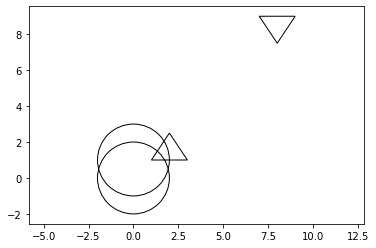

In [8]:
# tutorial - drawing - circles and triangles
fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 2, edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 1), 2, edgecolor='k', fill=False))

X = np.array([[1,1], [2,2.5], [3, 1], [8, 7.5], [7, 9], [9, 9]])
t1 = plt.Polygon(X[:3,:], edgecolor='k', fill=False)
plt.gca().add_patch(t1)
t2 = plt.Polygon(X[3:6,:], edgecolor='k', fill=False)
plt.gca().add_patch(t2)

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

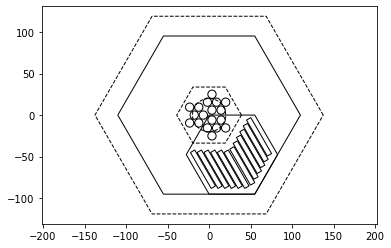

In [139]:
# The headache of the current fpu, unit mm
# "good optical range"
R_goodopt = 20
fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), R_goodopt, linestyle='--', edgecolor='k', fill=False))
# "current frame"
L = 275/2.
OF0 = np.array([[L,0],[L/2,np.sqrt(3)*L/2],[-L/2,np.sqrt(3)*L/2],[-L,0],[-L/2,-np.sqrt(3)*L/2],[L/2,-np.sqrt(3)*L/2]])
ax.add_patch(plt.Polygon(OF0[:,:], linestyle='--',edgecolor='k', fill=False))
# "current frame"
L = 220/2.
OF0 = np.array([[L,0],[L/2,np.sqrt(3)*L/2],[-L/2,np.sqrt(3)*L/2],[-L,0],[-L/2,-np.sqrt(3)*L/2],[L/2,-np.sqrt(3)*L/2]])
ax.add_patch(plt.Polygon(OF0[:,:], linestyle='-',edgecolor='k', fill=False))
#OFsb = np.array([[0,0],[L,0],[L/2,-np.sqrt(3)*L/2],[-L/2,-np.sqrt(3)*L/2]])
OFsb = np.array([[0,0],[L/2,0],[L/2*(1+1/2),-L/2*np.sqrt(3)/2],[L/2,-np.sqrt(3)*L/2],[0,-np.sqrt(3)*L/2],[-L/4,-L/4*np.sqrt(3)]])
ax.add_patch(plt.Polygon(OFsb[:,:], linestyle='-',edgecolor='k', fill=False))

# "current pixels"
d0 = 10
g0 = 1
def gen_rotmatx_deg(theta=0):
    rad = np.radians(theta)
    c, s = np.cos(rad), np.sin(rad)
    RM = np.array(((c, -s), (s, c)))
    return RM
    
def gen_hex_nlayers(di,gap,n=1,rot=0,ifplot=0):
    l = di+gap
    xy = np.zeros((0,2))
    for i in range(n):
        xyi = np.zeros((i+1,2))
        xyi[:,1] = -i*np.sqrt(3)*l/2
        xyi[:,0] = np.linspace(-i/2.,i/2.,i+1)*l
        xy = np.concatenate((xy,xyi))
    for i in range(len(xy)):
        xyii = xy[i]
        if ifplot:
            ax.add_patch(plt.Circle((xyii[0], xyii[1]), di/2, linestyle='--', edgecolor='k', fill=False))
    return xy
xy=gen_hex_nlayers(d0,g0,n=4)
xy=np.delete(xy,[0,6,8,9],axis=0)
xy[:,0] = xy[:,0] - xy[0,0] + (d0/2.+g0)/np.sqrt(3)
xy[:,1] = xy[:,1] - xy[0,1] - (d0/2.+g0)
for i in range(len(xy)):
    ax.add_patch(plt.Circle((xy[i][0], xy[i][1]), d0/2, linestyle='-', edgecolor='k', fill=False))

RM = gen_rotmatx_deg(theta=120)
xy1= np.dot(xy,RM)
for i in range(len(xy1)):
    ax.add_patch(plt.Circle((xy1[i][0], xy1[i][1]), d0/2, linestyle='-', edgecolor='k', fill=False))

RM = gen_rotmatx_deg(theta=240)
xy2= np.dot(xy,RM)
for i in range(len(xy2)):
    ax.add_patch(plt.Circle((xy2[i][0], xy2[i][1]), d0/2, linestyle='-', edgecolor='k', fill=False))
    



# "inner frame" ? what's for?
L = 39.
OF0 = np.array([[L,0],[L/2,np.sqrt(3)*L/2],[-L/2,np.sqrt(3)*L/2],[-L,0],[-L/2,-np.sqrt(3)*L/2],[L/2,-np.sqrt(3)*L/2]])
ax.add_patch(plt.Polygon(OF0[:,:], linestyle='--',edgecolor='k', fill=False))
    
# plot some rectangulars/spectrometers
L,W = 50,6
xyr0 = np.array([[W/2.,0],[-W/2.,0],[-W/2.,-L],[W/2,-L]])

xyr=xyr0.copy()
xyr[:,1]=xyr[:,1]-48
xyr[:,0]=xyr[:,0]-W/2.-1
RM = gen_rotmatx_deg(theta=-30)
xyr = np.dot(xyr,RM)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))

xyr=xyr0.copy()
xyr[:,1]=xyr[:,1]-48
xyr[:,0]=xyr[:,0]+W/2.+1
RM = gen_rotmatx_deg(theta=-30)
xyr = np.dot(xyr,RM)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()



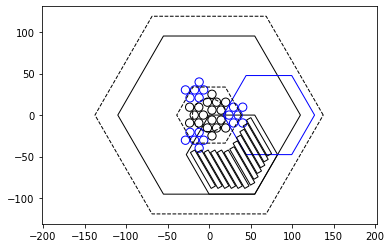

In [141]:
# The headache of the current fpu, unit mm
# "good optical range"
R_goodopt = 20
fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), R_goodopt, linestyle='--', edgecolor='k', fill=False))
# "current frame"
L = 275/2.
OF0 = np.array([[L,0],[L/2,np.sqrt(3)*L/2],[-L/2,np.sqrt(3)*L/2],[-L,0],[-L/2,-np.sqrt(3)*L/2],[L/2,-np.sqrt(3)*L/2]])
ax.add_patch(plt.Polygon(OF0[:,:], linestyle='--',edgecolor='k', fill=False))
# "current frame"
L = 220/2.
OF0 = np.array([[L,0],[L/2,np.sqrt(3)*L/2],[-L/2,np.sqrt(3)*L/2],[-L,0],[-L/2,-np.sqrt(3)*L/2],[L/2,-np.sqrt(3)*L/2]])
ax.add_patch(plt.Polygon(OF0[:,:], linestyle='-',edgecolor='k', fill=False))
OFsb = np.array([[0,0],[L/2,0],[L/2*(1+1/2),-L/2*np.sqrt(3)/2],[L/2,-np.sqrt(3)*L/2],[0,-np.sqrt(3)*L/2],[-L/4,-L/4*np.sqrt(3)]])
ax.add_patch(plt.Polygon(OFsb[:,:], linestyle='-',edgecolor='k', fill=False))

# "current pixels"
d0 = 10
g0 = 1
def gen_rotmatx_deg(theta=0):
    rad = np.radians(theta)
    c, s = np.cos(rad), np.sin(rad)
    RM = np.array(((c, -s), (s, c)))
    return RM
    
def gen_hex_nlayers(di,gap,n=1,rot=0,ifplot=0):
    l = di+gap
    xy = np.zeros((0,2))
    for i in range(n):
        xyi = np.zeros((i+1,2))
        xyi[:,1] = -i*np.sqrt(3)*l/2
        xyi[:,0] = np.linspace(-i/2.,i/2.,i+1)*l
        xy = np.concatenate((xy,xyi))
    for i in range(len(xy)):
        xyii = xy[i]
        if ifplot:
            ax.add_patch(plt.Circle((xyii[0], xyii[1]), di/2, linestyle='--', edgecolor='k', fill=False))
    return xy
xy=gen_hex_nlayers(d0,g0,n=4)
xy=np.delete(xy,[0,6,8,9],axis=0)
xy[:,0] = xy[:,0] - xy[0,0] + (d0/2.+g0)/np.sqrt(3)
xy[:,1] = xy[:,1] - xy[0,1] - (d0/2.+g0)
for i in range(len(xy)):
    ax.add_patch(plt.Circle((xy[i][0], xy[i][1]), d0/2, linestyle='-', edgecolor='k', fill=False))

RM = gen_rotmatx_deg(theta=120)
xy1= np.dot(xy,RM)
for i in range(len(xy1)):
    ax.add_patch(plt.Circle((xy1[i][0], xy1[i][1]), d0/2, linestyle='-', edgecolor='k', fill=False))

RM = gen_rotmatx_deg(theta=240)
xy2= np.dot(xy,RM)
for i in range(len(xy2)):
    ax.add_patch(plt.Circle((xy2[i][0], xy2[i][1]), d0/2, linestyle='-', edgecolor='k', fill=False))
    
RM = gen_rotmatx_deg(theta=-60)
xy3= np.dot(xy,RM)
x=np.abs(xy3[0,0])
xy3[:,0] = xy3[:,0]-x+x*np.sin(np.radians(30))+(d0+g0)*(1+np.sqrt(3)/2)
for i in range(len(xy3)):
    ax.add_patch(plt.Circle((xy3[i][0], xy3[i][1]), d0/2, linestyle='-', edgecolor='b', fill=False))

RM = gen_rotmatx_deg(theta=-120)
xy4= np.dot(xy3,RM)
for i in range(len(xy4)):
    ax.add_patch(plt.Circle((xy4[i][0], xy4[i][1]), d0/2, linestyle='-', edgecolor='b', fill=False))
xy5= np.dot(xy4,RM)
for i in range(len(xy5)):
    ax.add_patch(plt.Circle((xy5[i][0], xy5[i][1]), d0/2, linestyle='-', edgecolor='b', fill=False))

OFsb = np.array([[0,0],[L,0],[L/2,-np.sqrt(3)*L/2],[-L/2,-np.sqrt(3)*L/2]])
OFsb = np.array([[0,0],[L/2,0],[L/2*(1+1/2),-L/2*np.sqrt(3)/2],[L/2,-np.sqrt(3)*L/2],[0,-np.sqrt(3)*L/2],[-L/4,-L/4*np.sqrt(3)]])
RM = gen_rotmatx_deg(theta=-60)
OFsb2=np.dot(OFsb,RM)
OFsb2[:,0]=OFsb2[:,0]-x+x*np.sin(np.radians(30))+(d0+g0)*(1+np.sqrt(3)/2)
ax.add_patch(plt.Polygon(OFsb2, linestyle='-',edgecolor='b', fill=False))


# "inner frame" ? what's for?
L = 39.
OF0 = np.array([[L,0],[L/2,np.sqrt(3)*L/2],[-L/2,np.sqrt(3)*L/2],[-L,0],[-L/2,-np.sqrt(3)*L/2],[L/2,-np.sqrt(3)*L/2]])
ax.add_patch(plt.Polygon(OF0[:,:], linestyle='--',edgecolor='k', fill=False))
    
# plot some rectangulars/spectrometers
L,W = 50,6
xyr0 = np.array([[W/2.,0],[-W/2.,0],[-W/2.,-L],[W/2,-L]])

xyr=xyr0.copy()
xyr[:,1]=xyr[:,1]-48
xyr[:,0]=xyr[:,0]-W/2.-1
RM = gen_rotmatx_deg(theta=-30)
xyr = np.dot(xyr,RM)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]-(W+1)/np.cos(np.radians(30))
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))

xyr=xyr0.copy()
xyr[:,1]=xyr[:,1]-48
xyr[:,0]=xyr[:,0]+W/2.+1
RM = gen_rotmatx_deg(theta=-30)
xyr = np.dot(xyr,RM)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
xyr[:,0]=xyr[:,0]+(W+1)/np.cos(np.radians(30))*np.sin(np.radians(30))
xyr[:,1]=xyr[:,1]+(W+1)
ax.add_patch(plt.Polygon(xyr, linestyle='-',edgecolor='k', fill=False))
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

